In [1]:
import json
import os
from dotenv import load_dotenv
from langchain_upstage import UpstageEmbeddings
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


load_dotenv()

True

In [2]:

json_path = os.path.join(os.path.dirname('./'), "tool_name.json")

with open(json_path, "r", encoding="utf-8") as file:
    json_data = json.load(file)

In [3]:
json_data

{'0': 'drill', '1': 'hammer', '2': 'pliers', '3': 'screwdriver', '4': 'wrench'}

In [4]:
embeddings = UpstageEmbeddings(model="solar-embedding-1-large")

In [5]:
class_names = list(json_data.values())

In [6]:
res = embeddings.embed_documents(class_names)

In [7]:
import numpy as np

In [8]:
res = np.array(res)

In [9]:
res.shape

(5, 4096)

In [11]:
hammer = 'driver'

In [12]:
test_res = embeddings.embed_documents([hammer])

In [13]:
test_res = np.array(test_res)

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
cosine_similarity(test_res, res)

array([[0.47924181, 0.43197242, 0.41534446, 0.58025052, 0.44660972]])

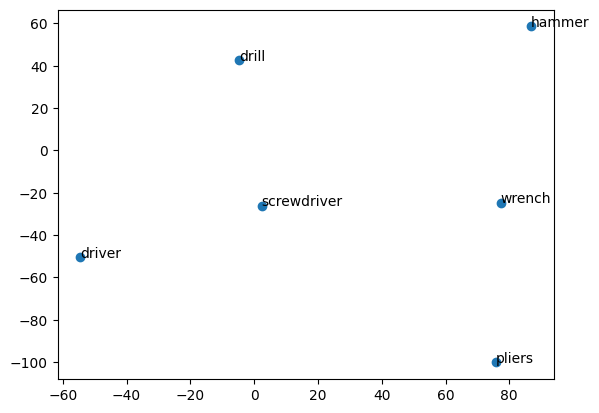

In [17]:
# TSNE로 시각화


tsne = TSNE(n_components=2, random_state=0, perplexity=3)
np.set_printoptions(suppress=True)

# 망치를 res에 추가하고 다시 시각화
res = np.concatenate([res, test_res], axis=0)
class_names.append(hammer)

Y = tsne.fit_transform(res)


plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(class_names, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

# ValueError: perplexity must be less than n_samples
# perplexity 값을 줄여주면 해결됨






